## Loading Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("supermarket_sales.csv")

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data.shape

(1000, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
# precentege of missing value in each column

data.isna().sum() / data.shape[0]

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

In [7]:
# duplicates in the data

data.duplicated().any()

False

In [8]:
# numeric values

data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
# categorical values

data.describe(include = object)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


## Cleaning

In [10]:
data["Date"] = pd.to_datetime(data["Date"])

In [11]:
data["Month"] = data["Date"].dt.month

In [12]:
data.drop(columns = ["Invoice ID","cogs", "gross margin percentage", "Date", "Time"], inplace = True)

In [14]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,gross income,Rating,Month
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,26.1415,9.1,1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,3.8200,9.6,3
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,16.2155,7.4,3
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,23.2880,8.4,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,30.2085,5.3,2


## Univariate Analysis and Visualizations

### Discovering `Branch` column

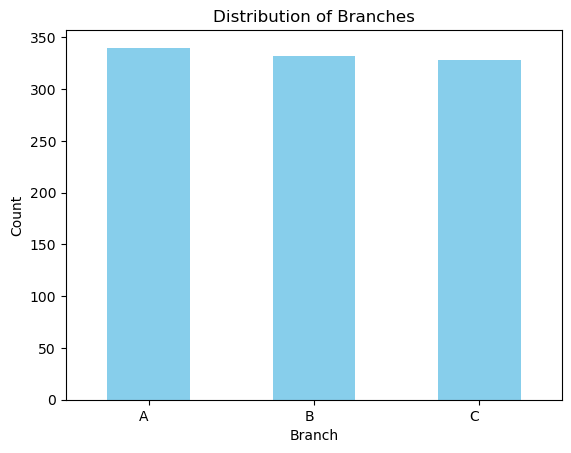

In [23]:
branch_counts = data['Branch'].value_counts()
ax = branch_counts.plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.xlabel('Branch')
plt.ylabel('Count')
plt.title('Distribution of Branches')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# Show the plot
plt.show()

**We can see :**

- We have 3 Branches "A", "B" and "C"
    - Almost equally distributed
    - Branche `A` has largest Sales numbers
    - Branche `C` has fewest Sales numbers

### Discovering `Customer type` column

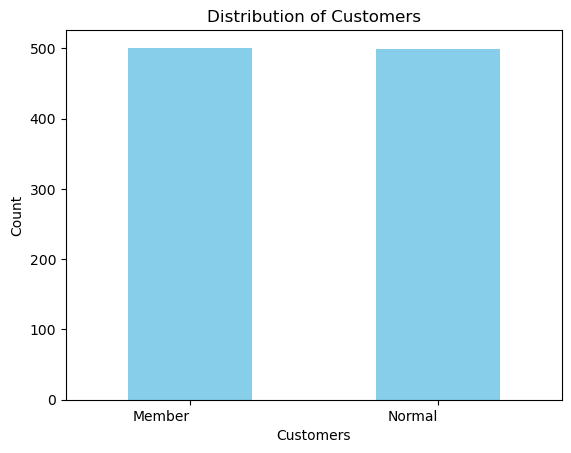

In [26]:
customer = data["Customer type"].value_counts()
ax = customer.plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.xlabel('Customers')
plt.ylabel('Count')
plt.title('Distribution of Customers')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='right')

# Show the plot
plt.show()

### From the above

- Almost equally distributed
- Most people come to branches has `member card`

### Discovering `Gender` column

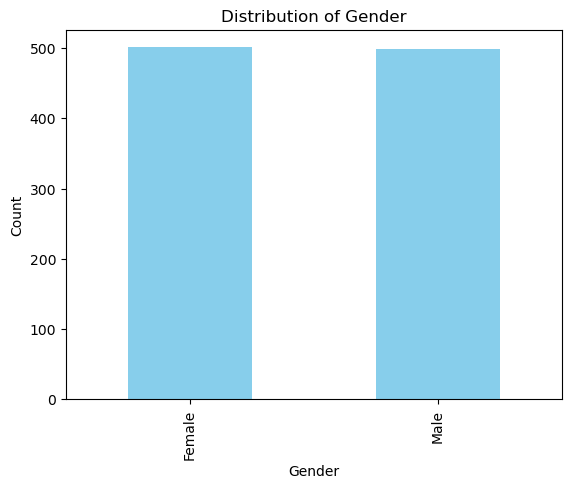

In [27]:
gender = data["Gender"].value_counts()
gender.plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()

### From the above

- Almost equally distributed
- Most Gender Come to branches is `female`

### Discovering `Product line` column

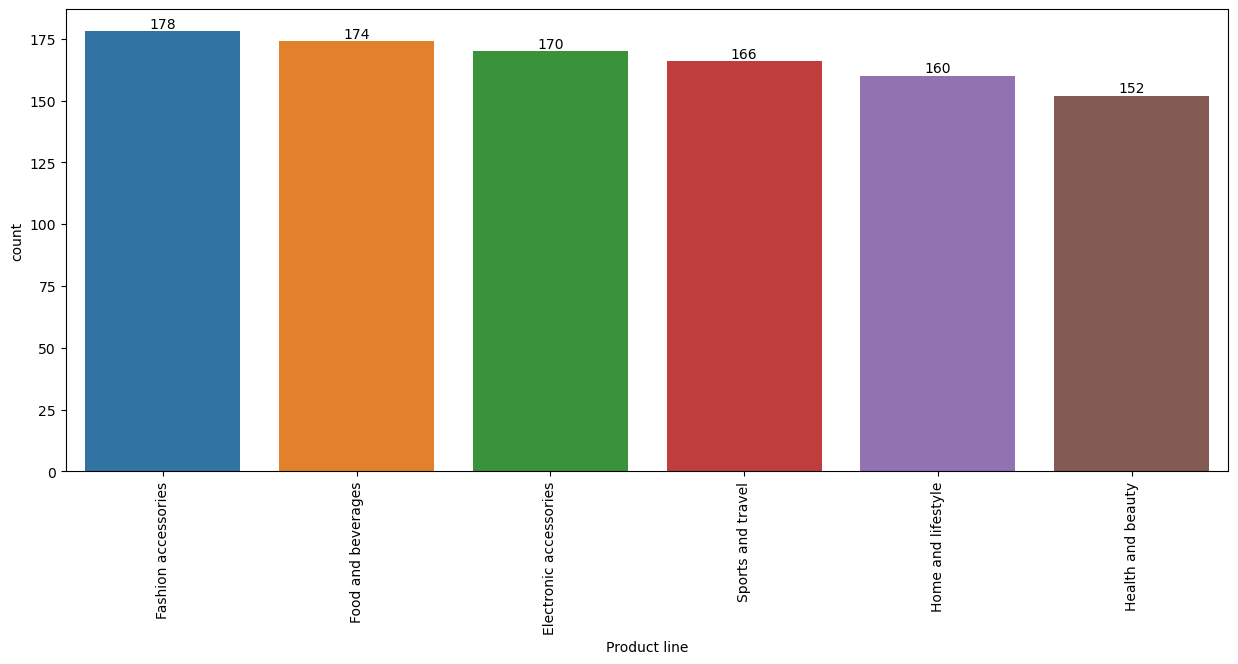

In [30]:
plt.figure(figsize = (15,6))

graph = sns.countplot(x = "Product line", data = data, order = data["Product line"].value_counts().index)
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation = 90)
plt.show()

**We can see :**

- Most sales in branches is **"Fashion accessories"**
- Lest sales in branches is **"Health and beauty"**

### Discovering `Payment` column

In [26]:
# see unique values

data["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

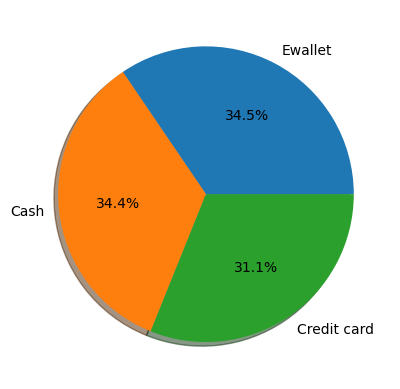

In [32]:
plt.pie(data["Payment"].value_counts(), labels = data["Payment"].value_counts().index, shadow = True, autopct = "%1.1f%%")
plt.show()

### From the above

- Almost equally distributed
- Customers prefered to `Ewallet`,`cash payments`

### Discovering `Rating` column

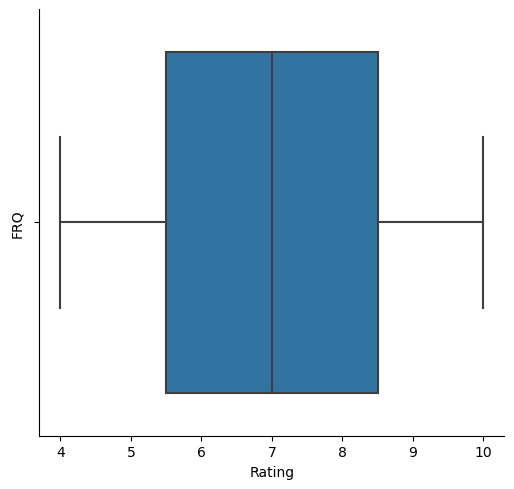

In [34]:
sns.catplot(x = "Rating", data = data, kind = "box")
plt.xlabel("Rating")
plt.ylabel("FRQ")
plt.show()

### From the above

- Average rating across products is approximately `7`

### Discovering `Month` column

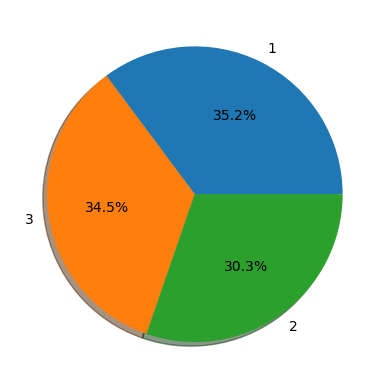

In [35]:
plt.pie(data["Month"].value_counts(), labels = data["Month"].value_counts().index, shadow = True, autopct = "%1.1f%%")
plt.show()

- Most sales in **"january"** month

## Bivariate Analysis & Visualizations

**1) There is relationship between gross income and customer ratings ?**

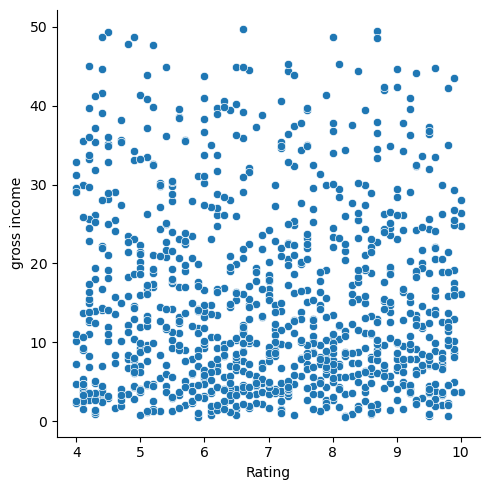

In [36]:
sns.relplot(x = "Rating", y = "gross income", data = data, kind = "scatter")
plt.show()

- **No relationship between rating and gross income**

**2) What is Gross Income of each branch ?**

In [42]:
def box_plot(x_axis = None, y_axis = None, hue = None, col = None):
    sns.catplot(x = x_axis, y = y_axis, data = data, hue = hue, kind = "box", col = col)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

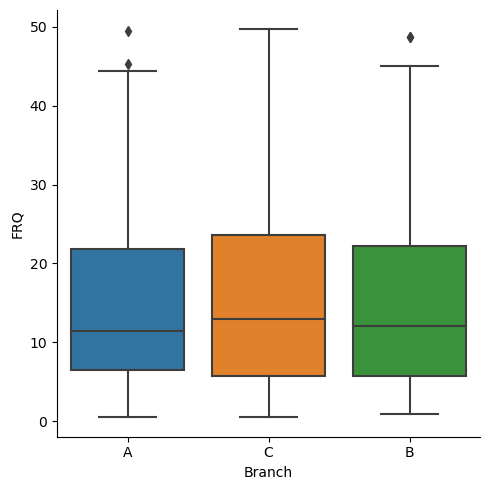

In [44]:
box_plot(x_axis = "Branch", y_axis = "gross income")



- Branch `C` stands out slightly with higher income compared to Branch `A` and `B`. Despite Branch `A` having slightly higher sales, it is Branch `C`  that emerges as the most profitable branch in terms of gross income

**3) See Gender come to branches**

In [45]:
def count_plot(x_axis, hue = None, rotation = 0):
    graph = sns.countplot(x = x_axis, data = data, hue = hue, order = data[x_axis].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation = rotation)
    plt.show()

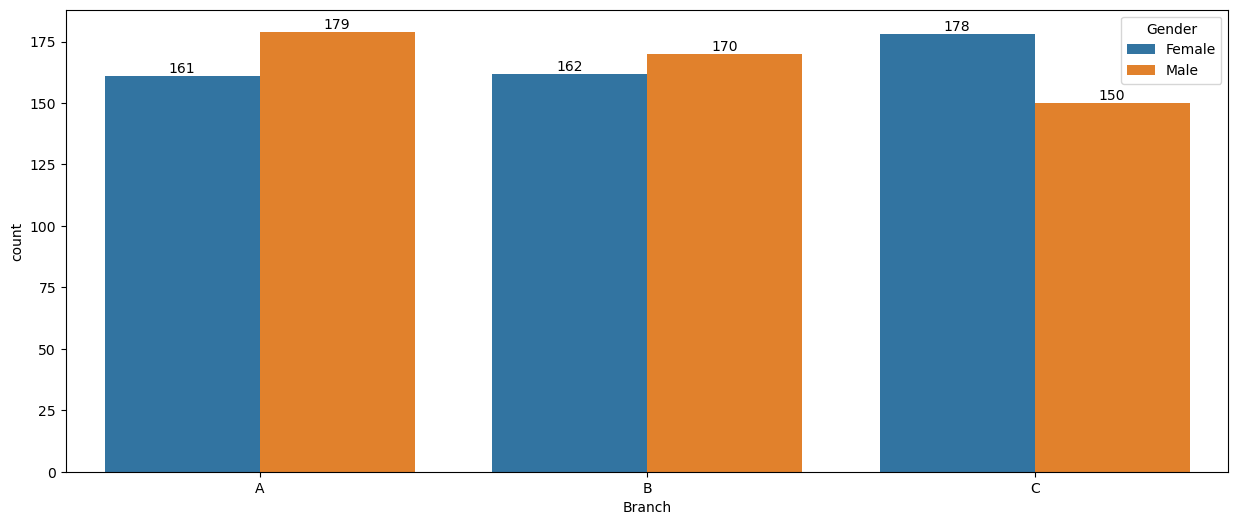

In [47]:
plt.figure(figsize = (15,6))
count_plot(x_axis = "Branch", hue = "Gender")

- Branch `A`,`B` has males greater than females, but branch `C` has females greater than males

**4) What is male and female gross income in each branch ?**

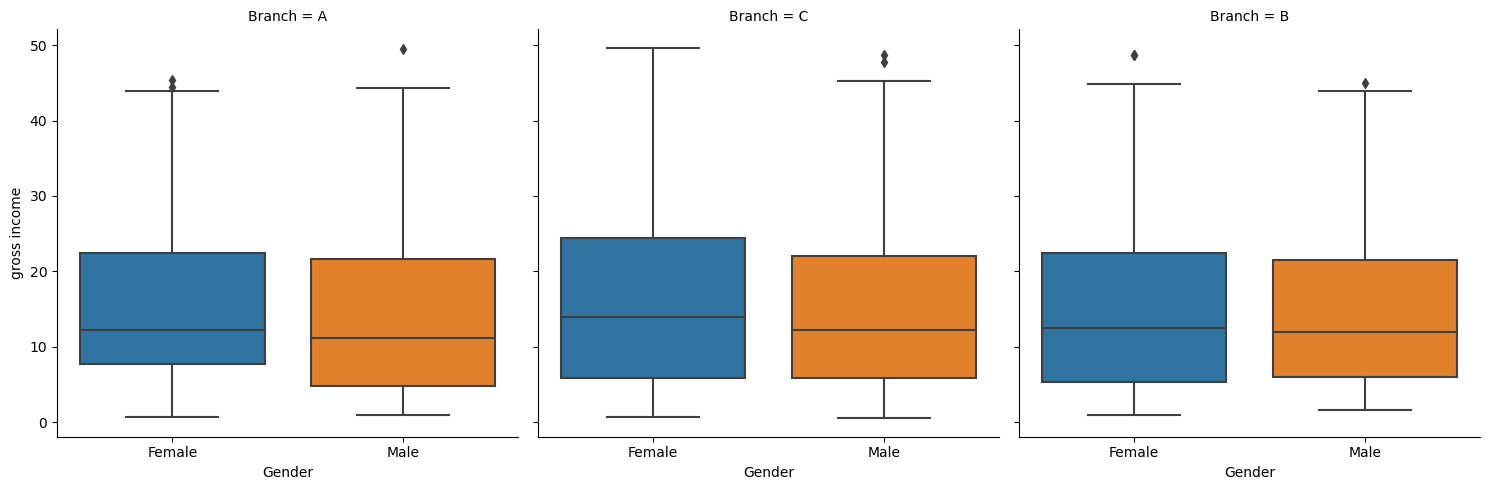

In [48]:
box_plot(x_axis = "Gender", y_axis = "gross income", col = "Branch")

- **"Female"** gross income greater than Male in each branch

**5) See sales product line in branches**

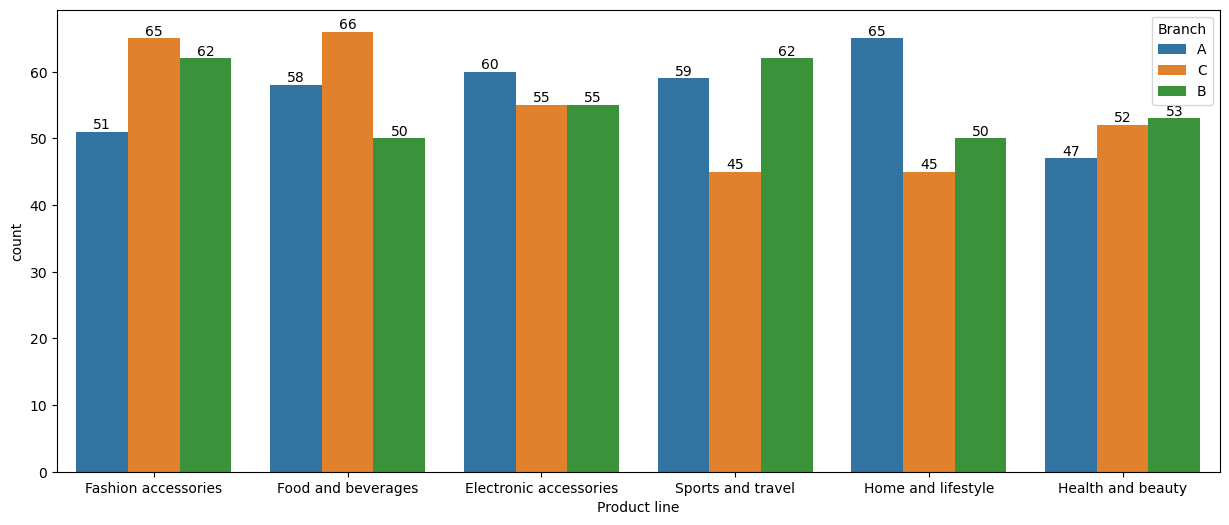

In [50]:
plt.figure(figsize=(15,6))
count_plot(x_axis = "Product line", hue = "Branch")

### From above
- "Electronic accessories", "Home and lifestyle" is the most sales in branch A
- "Health and beauty", "Sports and travel" is the most sales in branch B
- "Food and beverages", "Fashion accessories" is the most sales in branch C

**6) What is number of customer type of each branch ?**

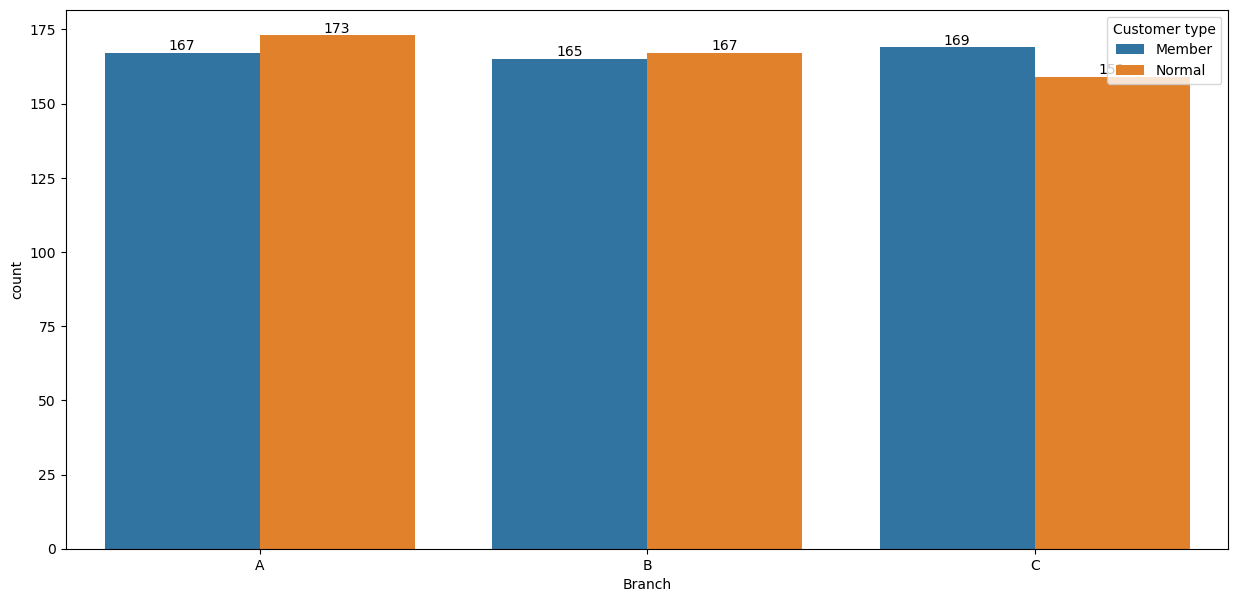

In [51]:
plt.figure(figsize=(15,7))
count_plot(x_axis = "Branch", hue = "Customer type")

### From above
- Branch `A`, `Normal` customer greater than `Member`
- Branch `B`, `Normal` customer greater than `Member`
- Branch `C`, `Member` customer greater than `Normal`

#### `When  number of members in Branch increased,Total of gross income increased`

**7) What is relation between customer gender and product line ?**

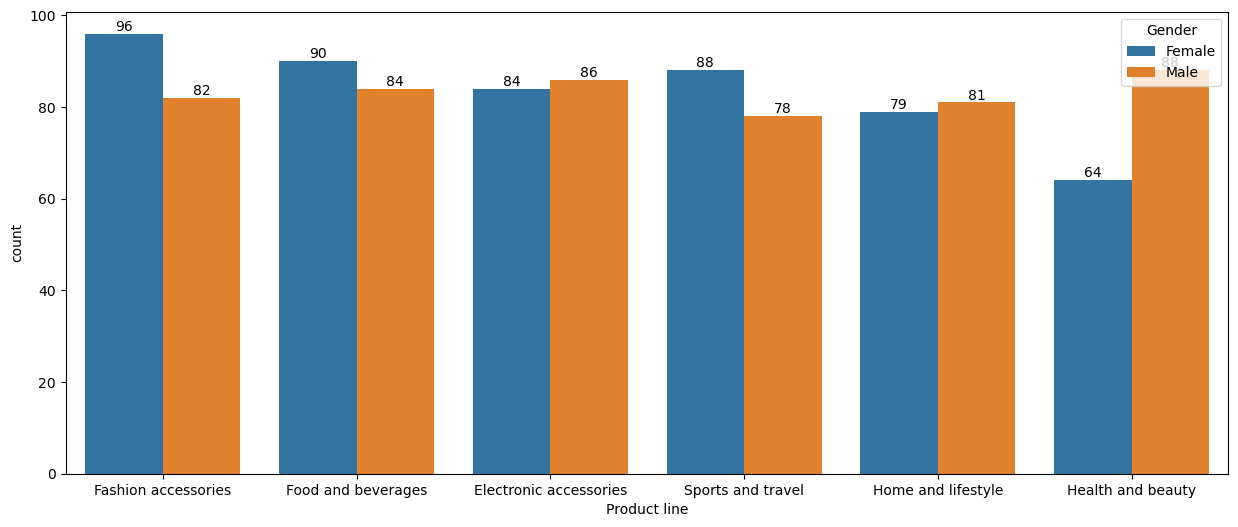

In [52]:
plt.figure(figsize=(15,6))
count_plot(x_axis = "Product line", hue = "Gender")


####  When number of females increase, `Fashion accessories` Product line increase

#### When number of male increase,`Health and beauty` Product line increase


**8) Which product line have greater gross income ?**

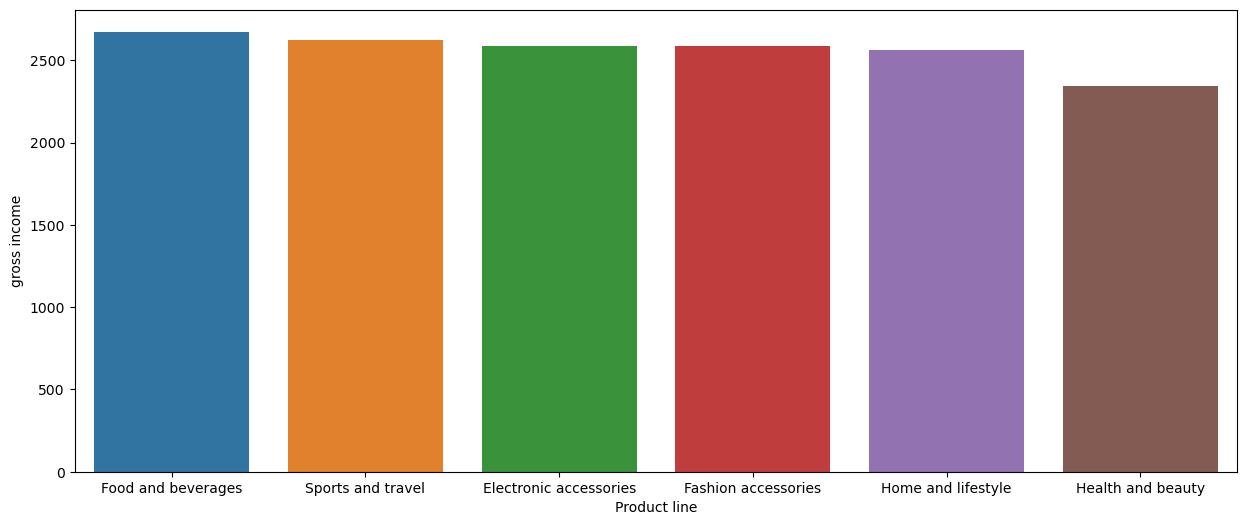

In [53]:
products = data.groupby("Product line")[["gross income"]].sum().sort_values(by = "gross income", ascending = False)

plt.figure(figsize=(15,6))
sns.barplot(x = products.index, y = "gross income", data = products)
plt.show()

-  Gross income is highest in `food and beverages`

**9) What is month has greater gross income in each branch ?**

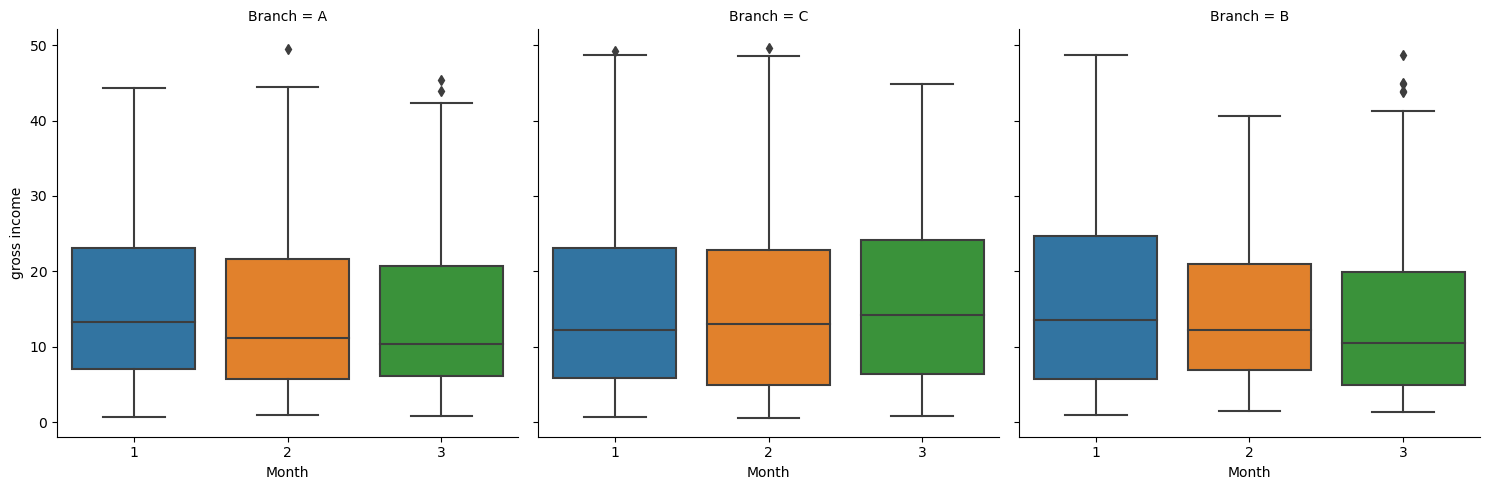

In [54]:
box_plot(x_axis = "Month", y_axis = "gross income", col = "Branch")

- "january" month has greater gross income

**10) What is greater sales  product line in each month ?**

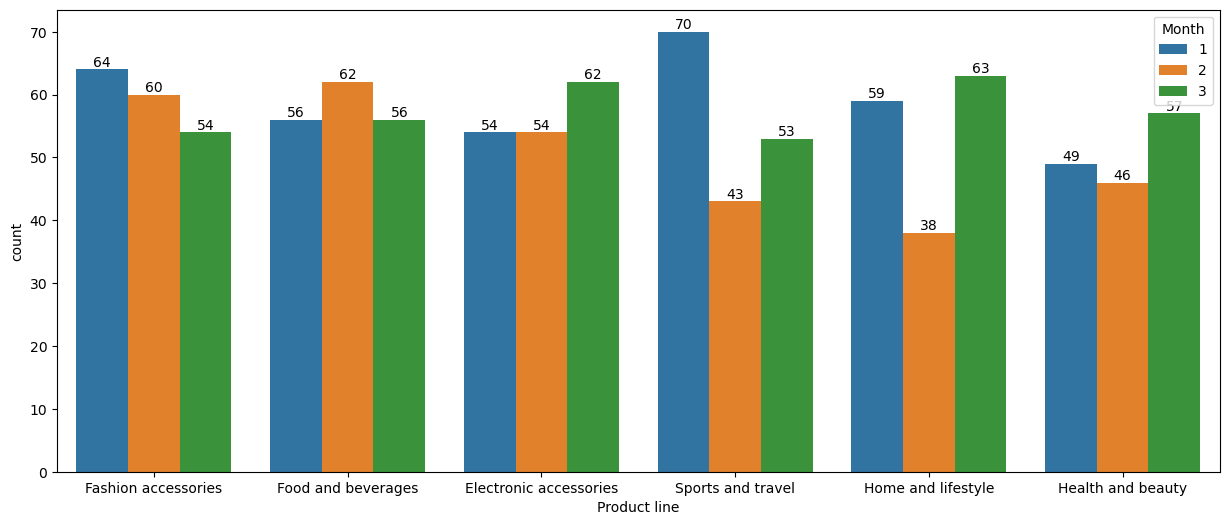

In [55]:
plt.figure(figsize=(15,6))
count_plot(x_axis = "Product line", hue = "Month")

### From above
- #### 1. January month
  - Sports and travel, Fashion accessories is the most product line sales

- #### 2. March month
    - Electronic accessories, Home and lifestyle is the most product line sales

- #### 3. February month
    - Food and beverages, Fashion accessories is the most product line sales


## Conclusion

- Customer average rating of approximately `7`. there was no relationship between customer ratings and gross income

- Among the three branches, Branch `C` as the most profitable in terms of gross income, despite Branch `A` having slightly higher sales

- `Fashion Accessories` and `Food and Beverages` were the most products. Therefore, must focus on these categories, with electronic accessories

- The preferred payment method for customers was found to be `Ewallet` and `Cash`

- `Food and Beverage` proved to be the category generating the highest gross income overall

- Females  spend the most on `fashion accessories`, while males  preference for `health and beauty` products Females also spending on `sports and travel`, which contributed to the highest overall income

- `In the end, there was no relationship between customer ratings were not significantly related to any variable`

### Project Goals:

The project goal is to conduct a comprehensive analysis of a supermarket sales dataset to derive meaningful insights and answers to various business-related questions. The analysis covers aspects such as branch performance, customer behavior, product line sales, and payment preferences.

1. **Understand Customer Behavior:**
   - Analyze the distribution of customers based on factors like gender, customer type, and preferred payment method.
   - Explore how customer ratings relate to other variables and if there's a significant impact on gross income.

2. **Branch Performance:**
   - Evaluate the performance of each branch in terms of total sales and gross income.
   - Identify patterns or differences in customer behavior across branches.

3. **Product Line Analysis:**
   - Determine which product lines contribute the most to overall sales and gross income.
   - Explore variations in product line sales across different branches and months.

4. **Time-Based Trends:**
   - Analyze sales trends over time, particularly focusing on monthly variations.
   - Identify any seasonality or patterns that may influence sales.

### Analytical Techniques:

The analysis primarily involves descriptive statistics, data visualization, and exploratory data analysis. Specific techniques and tools used include:

1. **Descriptive Statistics:**
   - Summary statistics (mean, median, standard deviation) for numeric columns like unit price, quantity, tax, total, gross income, and rating.
   - Counting unique values and frequency distributions for categorical columns.

2. **Data Visualization:**
   - Count plots, pie charts, and box plots to visually represent the distribution of categorical and numeric variables.
   - Scatter plots to explore relationships between variables, such as customer ratings and gross income.

3. **Branch and Product Line Analysis:**
   - Box plots and count plots to compare gross income and sales across different branches and product lines.

4. **Time-Series Analysis:**
   - Creation of a new "Month" column and subsequent analysis of gross income variations across different months.

While the current analysis focuses on descriptive and exploratory techniques, more advanced statistical methods or machine learning algorithms like regression analysis, clustering (K-means), or classification (KNN) will be considered in future iterations.

### Regression Analysis

We can perform regression analysis to understand the relationships between different variables. For example, we can explore whether there's a linear relationship between "Gross Income" and other numeric variables such as "Quantity," "Unit Price," or "Rating."

1. **Clustering (K-means):**
	- We can apply K-means clustering to identify potential customer segments based on their purchasing behavior. This can help in targeting specific customer groups with tailored marketing strategies.

2. **Classification (KNN):**
	- We can implement KNN to classify customer types or predict the payment method based on other features. This can help in understanding patterns in customer behavior.
    
3. **Predictive Modeling:**
	- We can use machine learning algorithms (e.g., linear regression, decision trees, or random forests) to predict future sales or gross income based on historical data. This can assist in making data-driven forecasts.
    
4. **Correlation Analysis:**
	- We can use statistical tests to quantify the strength and direction of relationships between different numeric variables. This can include Pearson correlation coefficients or other correlation measures.